In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import acquire
import prepare

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [ ]:
titanic2 = pd.read_csv('titanic_df.csv')
titanic2.head()

In [ ]:
titanic2.info()

##  Question 1 - Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

- What is your baseline prediction? 

- What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). 

- When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [ ]:
df = acquire.get_titanic_data()
df.head(2)


In [ ]:
df = prepare.prep_titanic_data(df)
df.head()


In [ ]:
df.info()

In [ ]:
df

In [ ]:
df.age = df.age.fillna(df.age.mean())


In [ ]:
df.info()


In [ ]:
df = df.drop(columns=['pclass', 'embarked', 'embarked_encode', 'passenger_id'])


In [ ]:
df = pd.get_dummies(df, ['sex', 'class', 'embark_town'], drop_first=True)
df.head()


In [ ]:
train, validate, test = prepare.split(df, stratify_by='survived')


In [ ]:
X_train = train.drop(columns=["survived"])
y_train = train.survived

X_validate = validate.drop(columns=["survived"])
y_validate = validate.survived

X_test = test.drop(columns=["survived"])
y_test = test.survived

In [ ]:
X_train.head()


In [ ]:
# X = titanic[['pclass', 'fare']]
# y = titanic.survived

# X_train_and_validate, X_test, y_train_and_validate, y_test = train_test_split(X, y, random_state=123, test_size=.3)
# X_train, X_validate, y_train, y_validate = train_test_split(X_train_and_validate, y_train_and_validate, random_state=123, test_size=.2)

# print("train: ", X_train.shape, ", validate: ", X_validate.shape, ", test: ", X_test.shape)
# print("train: ", y_train.shape, ", validate: ", y_validate.shape, ", test: ", y_test.shape)

In [ ]:
y_train.value_counts()


In [ ]:
baseline = y_train.mode()


matches_baseline_prediction = (y_train == 0)

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

## Question 2

- Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [ ]:
tree = DecisionTreeClassifier(max_depth = 3, random_state=123)

In [ ]:
tree = tree.fit(X_train, y_train)


In [ ]:
print(export_text(tree, feature_names=X_train.columns.tolist()))

In [ ]:
y_predictions = tree.predict(X_train)
y_predictions

In [ ]:
plt.figure(figsize=(12, 7))
plot_tree(tree, feature_names=X_train.columns, class_names=['0','1'])
plt.show()

## Question 3

- Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [ ]:
#confusematrix
pd.DataFrame(confusion_matrix(y_train, y_predictions))

In [ ]:
pd.crosstab(y_train, y_predictions)

In [ ]:
print(classification_report(y_train, y_predictions))

## Question 4

Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [ ]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree.score(X_train, y_train)))

In [ ]:
print(classification_report(y_train, y_predictions))

In [ ]:
# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of 1 depth")
pd.DataFrame(report)


## Question 4

- Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [ ]:
TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()


In [ ]:
TN, FP, FN, TP


In [ ]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train.value_counts())

In [ ]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

## Question 5

Run through steps 2-4 using a different max_depth value.

In [ ]:
for i in range(1, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f" Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

## Question 6 

- Which model performs better on your in-sample data?

In [ ]:
# Max depth of 15+ produces the highest accuracy

## Question 7 

- Which model performs best on your out-of-sample data, the validate set?

In [ ]:
# tree.score(X_validate, y_validate) 

In [ ]:
# y_validate.value_counts(normalize=True)

In [ ]:
#better accurace to guess not survived in the data

In [ ]:
metrics = []

for i in range(1, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])


 ## Work through these same exercises using the Telco dataset.

- What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). 
- When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [ ]:
telco = pd.read_csv('telco.csv')
telco.head()

In [ ]:
telco.isna().sum()

## Random forest Excercizes 

- Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

import acquire
import prepare

In [2]:
# Acquire Step
df = acquire.get_titanic_data()
df.head(2)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0


In [3]:
# prepare the data
df = prepare.prep_titanic_data(df)
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encode
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,3
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1,3
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0,3
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1,3


In [4]:
df.age = df.age.fillna(df.age.mean())

In [5]:
df = df.drop(columns=['pclass', 'embarked', 'embarked_encode', 'passenger_id'])


In [6]:
df = pd.get_dummies(df, ['sex', 'class', 'embark_town'], drop_first=True)
df.head()

,survived,age,sibsp,parch,fare,alone,sex_male,class_Second,class_Third,embark_town_Other,embark_town_Queenstown,embark_town_Southampton
0,0,22.0,1,0,7.2500,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,1,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,1,0,1,0,0,1


In [7]:
train, validate, test = prepare.split(df, stratify_by='survived')


In [8]:
X_train = train.drop(columns=["survived"])
y_train = train.survived

X_validate = validate.drop(columns=["survived"])
y_validate = validate.survived

X_test = test.drop(columns=["survived"])
y_test = test.survived

In [9]:
X_train.head()


,age,sibsp,parch,fare,alone,sex_male,class_Second,class_Third,embark_town_Other,embark_town_Queenstown,embark_town_Southampton
583,36.000000,0,0,40.1250,1,1,0,0,0,0,0
165,9.000000,0,2,20.5250,0,1,0,1,0,0,1
50,7.000000,4,1,39.6875,0,1,0,1,0,0,1
259,50.000000,0,1,26.0000,0,0,1,0,0,0,1
306,29.699118,0,0,110.8833,1,0,0,0,0,0,0


In [10]:
X_train.shape, X_validate.shape, X_test.shape


((498, 11), (214, 11), (179, 11))

In [11]:
y_train.value_counts()


0    307
1    191
Name: survived, dtype: int64

In [12]:
baseline = y_train.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = y_train == 0

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline prediction: {baseline[0]}")
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline prediction: 0
Baseline accuracy: 0.62


In [13]:
forest1 = RandomForestClassifier(max_depth=3, random_state=123)

# Fit the model (on train and only train)
forest1.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = forest1.predict(X_train)

# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of depth 3")
pd.DataFrame(report)

Tree of depth 3


,0,1,accuracy,macro avg,weighted avg
precision,0.805930,0.937008,0.839357,0.871469,0.856203
recall,0.973941,0.623037,0.839357,0.798489,0.839357
f1-score,0.882006,0.748428,0.839357,0.815217,0.830774
support,307.000000,191.000000,0.839357,498.000000,498.000000


In [14]:
pd.DataFrame(confusion_matrix(y_predictions, y_train))


,0,1
0,299,72
1,8,119


In [15]:
TN, FP, FN, TP = confusion_matrix(y_train,y_predictions).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN

(119, 299, 8, 72)

In [16]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.8393574297188755
True Positive Rate: 0.6230366492146597
False Positive Rate: 0.026058631921824105
True Negative Rate: 0.9739413680781759
False Negative Rate: 0.3769633507853403
Precision: 0.937007874015748
Recall: 0.6230366492146597
F1 Score: 0.7484276729559748
Support (0): 191
Support (1): 307


In [17]:
for i in range(2, 11):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = forest.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.776350    0.954128  0.815261    0.865239      0.844534
recall       0.983713    0.544503  0.815261    0.764108      0.815261
f1-score     0.867816    0.693333  0.815261    0.780575      0.800896
support    307.000000  191.000000  0.815261  498.000000    498.000000

Tree with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.805930    0.937008  0.839357    0.871469      0.856203
recall       0.973941    0.623037  0.839357    0.798489      0.839357
f1-score     0.882006    0.748428  0.839357    0.815217      0.830774
support    307.000000  191.000000  0.839357  498.000000    498.000000

Tree with max depth of 4
                    0           1  accuracy   macro avg  weighted avg
precision    0.825352    0.902098   0.84739    0.863725      0.854787
recall       0.954397    0.675393   0.84739    0.814895      0.847390
f1-score     

In [18]:
metrics = []

for i in range(2, 25):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.815261,0.780374,0.034887
1,3,0.839357,0.799065,0.040292
2,4,0.847390,0.822430,0.024960
3,5,0.863454,0.808411,0.055043
4,6,0.887550,0.817757,0.069793
5,7,0.921687,0.817757,0.103930
6,8,0.939759,0.808411,0.131348
7,9,0.957831,0.808411,0.149420
8,10,0.971888,0.794393,0.177495
9,11,0.977912,0.808411,0.169500


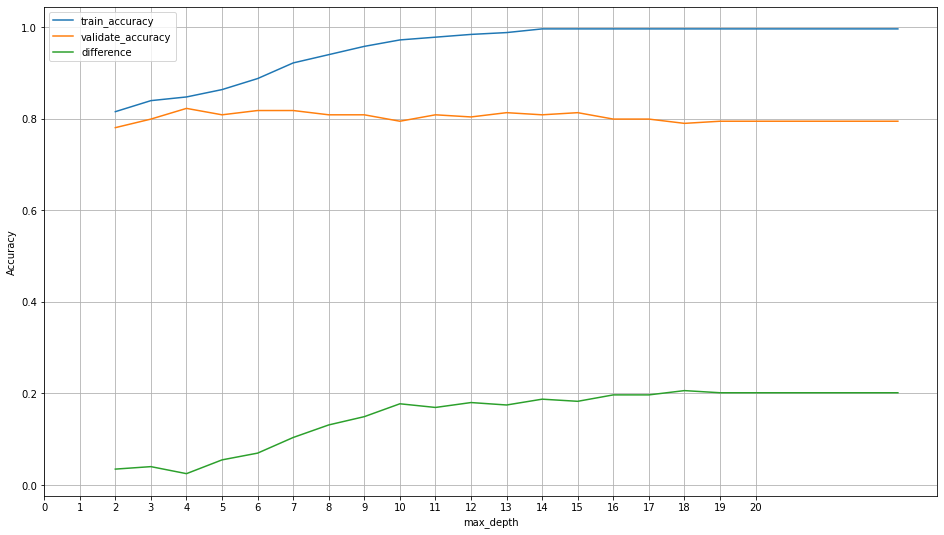

In [19]:
df.set_index('max_depth').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()


- Increasing min_samples_per_leaf, decreasing max_depth

In [20]:
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = max_depth - i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,18,0.923695,0.817757,0.105938
1,3,17,0.903614,0.813084,0.090530
2,4,16,0.889558,0.803738,0.085820
3,5,15,0.879518,0.808411,0.071107
4,6,14,0.873494,0.799065,0.074429
5,7,13,0.859438,0.789720,0.069718
6,8,12,0.857430,0.789720,0.067710
7,9,11,0.847390,0.803738,0.043651
8,10,10,0.843373,0.813084,0.030289
9,11,9,0.843373,0.794393,0.048981


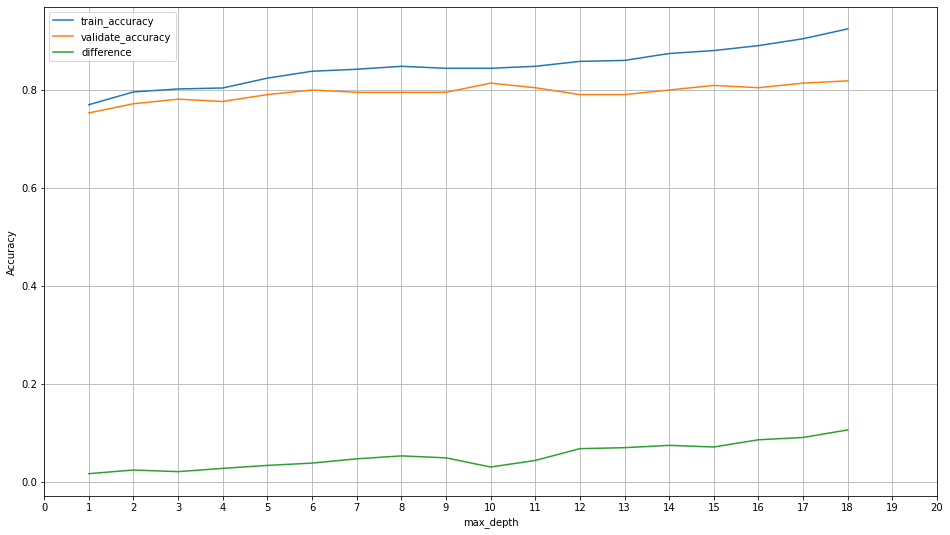

In [21]:
df.set_index('max_depth')[['train_accuracy', 'validate_accuracy','difference']].plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

- What about a fixed depth and increasing min_samples_leaf

In [22]:
metrics = []


for i in range(2, 50):
    # Make the model
    depth = 6
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,6,0.885542,0.817757,0.067785
1,3,6,0.871486,0.808411,0.063075
2,4,6,0.863454,0.794393,0.069061
3,5,6,0.861446,0.799065,0.062380
4,6,6,0.861446,0.789720,0.071726
5,7,6,0.853414,0.789720,0.063694
6,8,6,0.849398,0.799065,0.050332
7,9,6,0.847390,0.794393,0.052997
8,10,6,0.849398,0.822430,0.026968
9,11,6,0.845382,0.799065,0.046316


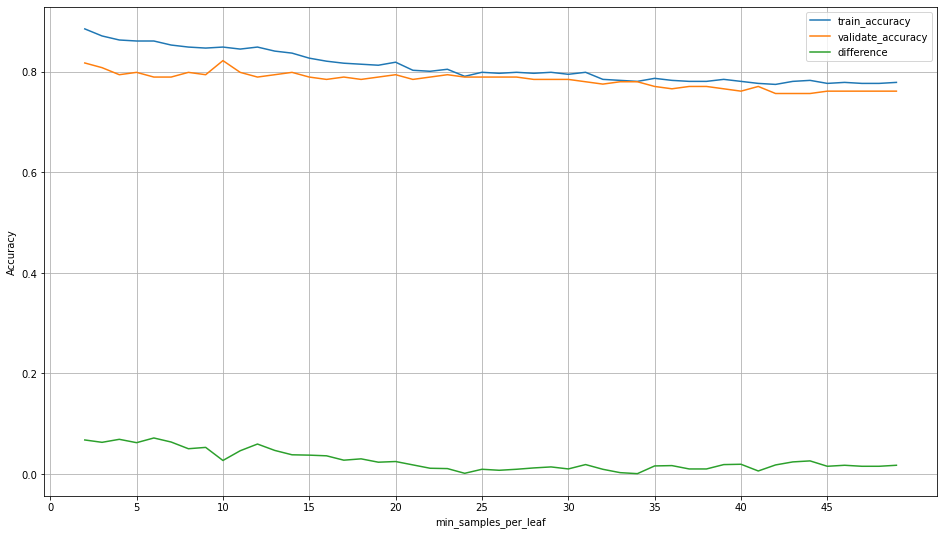

In [23]:
df.set_index('min_samples_per_leaf')[['train_accuracy', 'validate_accuracy', 'difference']].plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,50,5))
plt.grid()

In [ ]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(titanic, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [ ]:
train, validate, test = train_validate_test_split(titanic, target='survived', seed=123)

# Explore your data here. 

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived


In [ ]:
X_train

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(max_depth=3, 
                            random_state=123)
rf

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_train)
y_pred

- Evaluate your results using the model score, confusion matrix, and classification report.

In [ ]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

In [ ]:
print(confusion_matrix(y_train, y_pred))

In [ ]:
print(classification_report(y_train, y_pred))

- Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [ ]:
forest1 = RandomForestClassifier(max_depth=1, random_state=123)

# Fit the model (on train and only train)
forest1.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = forest1.predict(X_train)

# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
pd.DataFrame(report)

In [ ]:
TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()

TN, FP, FN, TP

In [ ]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

- Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [ ]:
for i in range(6, 15):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f" Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

- What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [ ]:
metrics = []

for i in range(1, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()